In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import os
import numpy as np
import pandas as pd

import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import os


In [2]:
categories=['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']
directory = '/kaggle/input/flowers-recognition/flowers'


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
features=[]
for i in categories:
    path=os.path.join(directory,i)
    num_classes=categories.index(i)
    for img in os.listdir(path):
        if img.endswith('.jpg'):
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
            img_array=cv2.resize(img_array,(150,150))
            features.append([img_array,num_classes])

In [4]:
X=[]
y=[]
for i,j in features:
    X.append(i)
    y.append(j)

In [5]:
X=np.array(X).reshape(-1,150,150,3)/255.0

In [6]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(y)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=12)

In [8]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam # - Works
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import SGD
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical



# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [9]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(5, activation="softmax"))

2022-03-25 23:08:32.333173: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-25 23:08:32.334192: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-25 23:08:32.334823: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-25 23:08:32.335892: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [10]:
epochs = 50

#from keras.callbacks import ReduceLROnPlateau
#red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5)

In [11]:
#Addd more data to avoid ovverfitting
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [12]:
model.compile(optimizer=Adam(learning_rate =0.001 ),loss='categorical_crossentropy',metrics=['accuracy'])
#model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0

In [14]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=128),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // 128)

#History = model.fit(x_train,y_train,validation_split=0.20,batch_size = 128,epochs = 100)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-03-25 23:08:39.088604: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-03-25 23:08:41.427418: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


23/23 [==============================] - ETA: 0s - loss: 1.7438 - accuracy: 0.2427

2022-03-25 23:09:01.679492: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 349920000 exceeds 10% of free system memory.
2022-03-25 23:09:02.080518: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 349920000 exceeds 10% of free system memory.


23/23 [==============================] - 24s 727ms/step - loss: 1.7438 - accuracy: 0.2427 - val_loss: 1.4897 - val_accuracy: 0.3904
Epoch 2/50
23/23 [==============================] - 15s 666ms/step - loss: 1.3696 - accuracy: 0.3954 - val_loss: 1.1942 - val_accuracy: 0.5046
Epoch 3/50
23/23 [==============================] - 14s 629ms/step - loss: 1.2510 - accuracy: 0.4449 - val_loss: 1.1582 - val_accuracy: 0.4915
Epoch 4/50
23/23 [==============================] - 16s 673ms/step - loss: 1.1964 - accuracy: 0.4687 - val_loss: 1.0937 - val_accuracy: 0.5540
Epoch 5/50
23/23 [==============================] - 15s 642ms/step - loss: 1.1638 - accuracy: 0.5130 - val_loss: 1.0319 - val_accuracy: 0.5679
Epoch 6/50
23/23 [==============================] - 17s 738ms/step - loss: 1.1186 - accuracy: 0.5455 - val_loss: 1.0113 - val_accuracy: 0.5880
Epoch 7/50
23/23 [==============================] - 17s 731ms/step - loss: 1.0538 - accuracy: 0.5781 - val_loss: 0.9271 - val_accuracy: 0.6335
Epoch 8/50

In [15]:
results = model.evaluate(x_test, y_test, batch_size = 128)
print("Validation loss, accuracy:", results)

2022-03-25 23:24:04.816936: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 349920000 exceeds 10% of free system memory.
2022-03-25 23:24:05.243892: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 349920000 exceeds 10% of free system memory.


11/11 [==============================] - 0s 26ms/step - loss: 0.6589 - accuracy: 0.7562
Validation loss, accuracy: [0.6588866710662842, 0.7561728358268738]


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
val_pred = model.predict(x_test)
predicted = np.argmax(val_pred, axis=1)

plt.figure(figsize=(8,8))

actual = np.argmax(y_test, axis=1)
print(classification_report(actual, predicted, target_names = categories))

2022-03-25 23:24:06.090821: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 349920000 exceeds 10% of free system memory.


              precision    recall  f1-score   support

   dandelion       0.88      0.71      0.79       318
       daisy       0.78      0.77      0.77       207
   sunflower       0.80      0.85      0.82       236
       tulip       0.70      0.76      0.73       290
        rose       0.65      0.71      0.68       245

    accuracy                           0.76      1296
   macro avg       0.76      0.76      0.76      1296
weighted avg       0.76      0.76      0.76      1296



<Figure size 576x576 with 0 Axes>

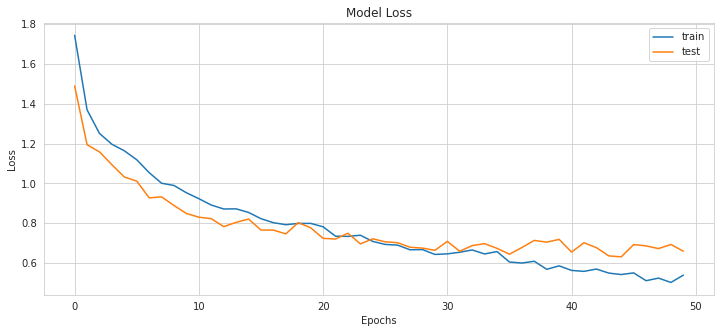

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

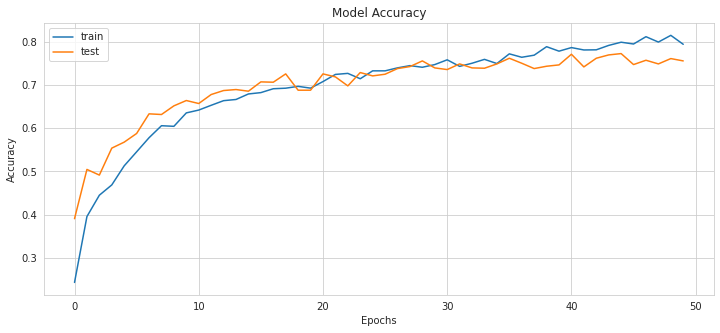

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [19]:
preds=model.predict(x_test)

In [20]:
predictions=np.argmax(preds,axis=1)

In [21]:
#Make changes here this is all messed up
correct_class=[]
incorrect_class=[]
dandelion_class =[]
correct_prediction= []
average_prediction = 0
i=0

correct_pred = {classname: 0 for classname in categories}
total_pred = {classname: 0 for classname in categories}

temp =[]
for i in y_test:
    k = i.tolist().index(1) # i will return index of 2
    temp.append(k)


#classes = categories=['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']
#print(y_test)
for i in range(len(y_test)):
    for label, prediction in zip(temp, predictions): #Need to change this to  refelct the zip between labesl of test and prediction
        #print("label"+str(label))
        #print("prediction"+str(categories[prediction]))
        if label == prediction:
            correct_pred[categories[label]] += 1
        total_pred[categories[label]] += 1
for classname, correct_count in correct_pred.items():
    #print(classname)
    #print(correct_pred)
    #print(classname)
    #print(correct_count)
    
    if(total_pred[classname] == 0):
        continue
    else:
        accuracy = 100 * float(correct_count) / total_pred[classname]
        average_prediction = average_prediction + accuracy

        print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
    
            
print("Average prediction is "+ str((average_prediction/5)))            


Accuracy for class: dandelion is 71.4 %
Accuracy for class: daisy is 76.8 %
Accuracy for class: sunflower is 84.7 %
Accuracy for class: tulip is 75.9 %
Accuracy for class: rose  is 71.0 %
Average prediction is 75.96469636845752


In [23]:
i=0
for i in range(len(y_test)):
    
    if (np.argmax(y_test[i])!=predictions[i]):
        
        incorrect_class.append(i)
    if (len(incorrect_class)==8):
        break
        

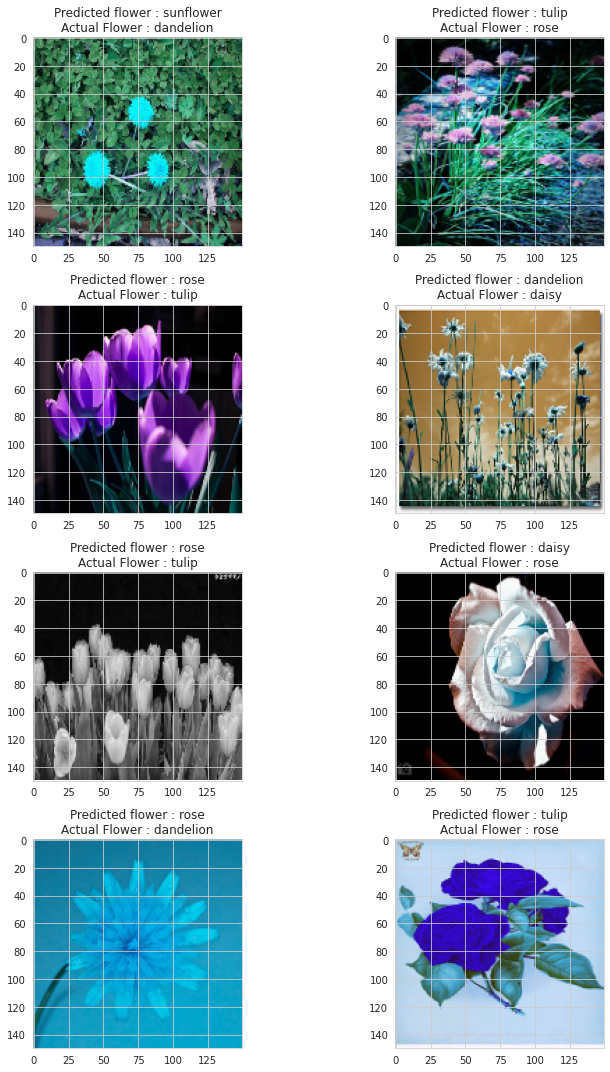

In [24]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range(4):
    for j in range(2):
        ax[i,j].imshow(x_test[incorrect_class[count]])
        ax[i,j].set_title("Predicted flower : " + categories[predictions[incorrect_class[count]]] + "\n"+"Actual Flower : " +categories[np.argmax(y_test[incorrect_class[count]])])
        plt.tight_layout()
        count+=1

In [25]:
import requests
from PIL import Image
from io import BytesIO

def process_image(url):
    response=requests.get(url)
    img=Image.open(BytesIO(response.content))
    fix,ax=plt.subplots(1,3,figsize=(15,20))
    ax[0].imshow(img)
    ax[0].set_title('image')
    
    #grayscale and normalization
    img=np.array(img)
    img=cv2.cvtColor(img,cv2.IMREAD_COLOR)
    print(img.shape)
    img=img/255.0
    ax[1].imshow(img)
    ax[1].set_title('color image')
    
    #resizing
    img=cv2.resize(img,(150,150))
    print(img.shape)
    ax[2].imshow(img)
    ax[2].set_title('predicted image')
    plt.tight_layout()
    img=np.expand_dims(img,axis=0)
    #making it model ready
    
    print(img.shape)
    return img

In [26]:
def predict(url):
    img=process_image(url)
    label=model.predict(img)
    final_1=np.argmax(label,axis=1)[0]
    plt.xlabel(categories[final_1])
    return categories[final_1]

(300, 300, 3)
(150, 150, 3)
(1, 150, 150, 3)


'rose'

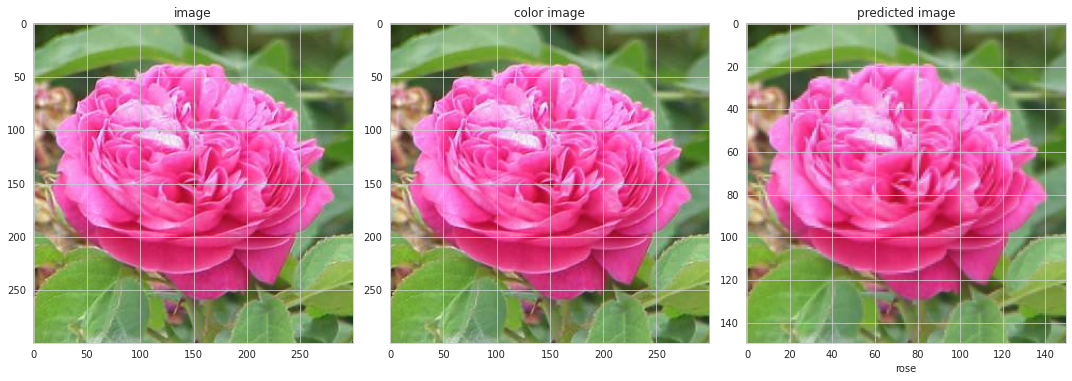

In [27]:
predict("https://cdn.shopify.com/s/files/1/0849/0686/products/roaseweb_1024x1024.jpg?v=1569907015")